In [347]:
# first make sure the input data are good 
import numpy as np 
import os 
import sys
from scipy.stats import zscore

if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
    
os.chdir(main_fold_path)
fold_path = 'allData/prognosis_mix_hb/pretreatment_response'
clinical_data = np.load(fold_path + '/baseline_clinical_data.npy', allow_pickle=True)
demographic_data = np.load(fold_path + '/demografic_data.npy', allow_pickle=True)
# MMDT_score = np.load(fold_path + '/MMDT_score.npy', allow_pickle=True)[..., np.newaxis]

Current system is macOS


In [348]:

# CGI in T1 only has 1 value which is severity, so we delete them
def read_base_T2_SDS_CGI(fold_path):
    all_clinical = np.load(fold_path + '/CLINICAL_HISTORY.npy', allow_pickle=True)
    all_clinical_chosen_index = np.arange(0, 6).tolist() + np.arange(8, 16).tolist()
    all_clinical_chosen_index = np.array(all_clinical_chosen_index) 
    return all_clinical[:, all_clinical_chosen_index]


def read_pychiatry(fold_path):
    pyschiatry = np.load(fold_path + '/PSYCHIATRY_HISTORY.npy', allow_pickle=True)
    all_pyschiatry_chosen_index = np.arange(4).tolist() + np.arange(6, 15).tolist()
    all_pyschiatry_chosen_index = np.array(all_pyschiatry_chosen_index)
    return pyschiatry[:, all_pyschiatry_chosen_index]



def read_HAMD_score(fold_path):
    HAMD_ALL = np.load(fold_path + '/HAMD_ALL_HISTORY.npy', allow_pickle=True)
    HAMD_base_T2 = HAMD_ALL[:, :2]
    HAMD_reduction = (HAMD_ALL[:, 1] - HAMD_ALL[:, 0]) / HAMD_ALL[:, 0]
    HAMD_T1_T2_reduction = np.concatenate((HAMD_base_T2, HAMD_reduction[..., np.newaxis]), axis=1)
    return HAMD_T1_T2_reduction

def read_demographic(fold_path):
    demographic_data = np.load(fold_path + '/demographic.npy', allow_pickle=True)
    return demographic_data


base_T2_SDS_CGI = read_base_T2_SDS_CGI(fold_path)
pyschiatry = read_pychiatry(fold_path)
print(pyschiatry[:, -3])
HAMD_score = read_HAMD_score(fold_path)
demographic = read_demographic(fold_path)

[1 1 1 1 nan 1 1 1 1 1 1 1 1 1 nan 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 nan 1 1 1
 1 1 nan nan 1 nan nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 '1\n' 1 1]


In [340]:
demographic_data

array([[40, 2, 1, 3, 16, 16, 1, 1, 0, 0, 1],
       [23, 2, 1, 1, 16, 6, 2, 0, 0, 0, 0],
       [23, 2, 1, 1, 16, 6, 2, 0, 1, 3, 1],
       [21, 1, 1, 1, 13, 5, 2, 0, 1, 4, 1],
       [29, 2, 1, 1, 16, 6, 2, 1, 1, 2, 0],
       [42, 2, 1, 1, 16, 6, 1, 1, 1, 1, 0],
       [34, 1, 1, 1, 16, 6, 2, 0, 0, 0, 0],
       [38, 2, 4, 1, 16, 6, 2, 0, 1, 2, 1],
       [36, 2, 2, 1, 10, 3, 2, 1, 0, 0, 0],
       [21, 1, 1, 3, 13, 5, 2, 0, 1, 3, 1],
       [22, 2, 1, 1, 16, 6, 2, 0, 1, 2, 1],
       [48, 2, 1, 1, 10, 3, 1, 0, 1, 2, 0],
       [22, 2, 3, 1, 13, 5, 2, 0, 1, 2, 0],
       [23, 2, 2, 1, 16, 6, 2, 0, 0, 0, 1],
       [47, 1, 1, 3, 16, 6, 1, 0, 0, 0, 1],
       [28, 2, 1, 1, 10, 3, 1, 1, 1, 1, 1],
       [30, 2, 3, 1, 16, 6, 3, 1, 0, 0, 0],
       [23, 1, 1, 1, 16, 6, 1, 0, 0, 0, 0],
       [38, 2, 1, nan, 13, 5, 2, 1, 0, 0, 0],
       [38, 1, 2, 1, 13, 5, 3, 0, 0, 0, 1],
       [24, 2, 3, 3, 16, 6, 2, 0, 1, 4, 1],
       [41, 2, 1, 1, 13, 5, 2, 1, 0, 0, 0],
       [35, 2, 2, 1, 16, 6, 1

In [349]:
demographic

array([[40, 2, 1, 3, 16, 16, 1],
       [23, 2, 1, 1, 16, 6, 2],
       [23, 2, 1, 1, 16, 6, 2],
       [21, 1, 1, 1, 13, 5, 2],
       [29, 2, 1, 1, 16, 6, 2],
       [42, 2, 1, 1, 16, 6, 1],
       [34, 1, 1, 1, 16, 6, 2],
       [38, 2, 4, 1, 16, 6, 2],
       [36, 2, 2, 1, 10, 3, 2],
       [21, 1, 1, 3, 13, 5, 2],
       [22, 2, 1, 1, 16, 6, 2],
       [48, 2, 1, 1, 10, 3, 1],
       [22, 2, 3, 1, 13, 5, 2],
       [23, 2, 2, 1, 16, 6, 2],
       [47, 1, 1, 3, 16, 6, 1],
       [28, 2, 1, 1, 10, 3, 1],
       [30, 2, 3, 1, 16, 6, 3],
       [23, 1, 1, 1, 16, 6, 1],
       [38, 2, 1, nan, 13, 5, 2],
       [38, 1, 2, 1, 13, 5, 3],
       [24, 2, 3, 3, 16, 6, 2],
       [41, 2, 1, 1, 13, 5, 2],
       [35, 2, 2, 1, 16, 6, 1],
       [22, 2, 1, 1, 12, 6, 2],
       [43, 2, 3, 1, 16, 6, 2],
       [24, 2, 3, 1, 16, 6, 3],
       [29, 2, 2, 1, 13, 5, 2],
       [23, 2, 2, 1, 16, 6, 2],
       [23, 1, 1, 1, 16, 6, 2],
       [24, 1, 1, 3, 13, 5, 1],
       [23, 2, 2, 1, 13, 5, 2],
     

In [204]:
K_FOLD = 5

fnirs_feature_path_1 = fold_path + '/fnirs_pred_loocv1.npy'
fnirs_feature_path_2 = fold_path + '/fnirs_pred_loocv2.npy'
fnirs_feature_path_4 = fold_path + '/fnirs_pred_loocv4.npy'

fnirs_prediction_all = []
for path in [fnirs_feature_path_1, fnirs_feature_path_2, fnirs_feature_path_4]:

    fnirs_pred = np.load(path, allow_pickle=True)

    y_pred = np.reshape(fnirs_pred, (-1, K_FOLD, 2))
    fnirs_feature = np.mean(y_pred, axis=1)[:, 1:]
    fnirs_prediction_all.append(fnirs_feature)
    
fnirs_prediction_all = np.concatenate(fnirs_prediction_all, axis=1)
fnirs_prediction_all = fnirs_prediction_all[:, -1:]
print(fnirs_prediction_all.shape)

(64, 1)


In [360]:

def replace_nan_with_mean(data):
    input = data.copy()
    for i in range(input.shape[1]):
        col = input[:, i]
        col = np.array(col, dtype=float)
        mean_value = np.nanmean(col)
        col[np.isnan(col)] = mean_value
        input[:, i] = col
    return input
def impute_nan_data(data):
    input = data.copy()
    from sklearn.experimental import enable_iterative_imputer
    # Now you can import IterativeImputer
    from sklearn.impute import IterativeImputer


    # Create an instance of IterativeImputer
    imputer = IterativeImputer()

    # Fit the imputer on the clinical_data ndarray
    imputer.fit(input)

    # Transform the clinical_data ndarray by imputing the NaN values
    imputed_data = imputer.transform(input)
    return imputed_data

def process_with_nan_using_imputation_zscore(data):
    data[data == 'missing data'] = np.nan
    data.astype(float)
    data = impute_nan_data(data)
    data = zscore(data, axis=0)
    return data

mean_clinical_data = replace_nan_with_mean(clinical_data)
imputed_clinical_data = impute_nan_data(clinical_data)
z_imputed_clinical_data = zscore(imputed_clinical_data, axis=0)

# add MMDT data

demographic_data = demographic_data.astype(float)
demographic_data = impute_nan_data(demographic_data)
demographic_data = zscore(demographic_data, axis=0)

In [258]:
import numpy as np
import numpy as np
# Replace missing data with nan
# Replace 'missing data' with NaN
x = base_T2_SDS_CGI.copy()

x[x == 'missing data'] = np.nan
print(x)


[[10 10 10 7 7 6 nan 10 10 0 7 3 3 10]
 [nan 10 4 2 7 4 6 8 2 4 7 3 2 10]
 [7 8 9 3 2 6 0 7 8 0 1 4 2 9]
 [7 7 7 7 7 4 4 8 8 7 6 4 5 15]
 [4 8 4 1 0 4 2 3 5 0 0 4 nan nan]
 [4 4 4 0 0 3 nan 7 7 0 0 3 4 9]
 [7 6 7 0 5 3 7 6 8 0 3 4 3 10]
 [3 6 6 0 3 4 3 5 5 0 7 4 4 11]
 [nan 9 8 0 4 4 2 8 8 0 3 4 3 10]
 [8 8 8 3 7 4 5 9 3 3 3 3 2 6]
 [6 8 8 1 7 4 2 6 3 0 2 4 3 9]
 [4 7 6 0 3 4 nan 6 7 0 7 4 4 10]
 [nan 7 5 0 0 4 nan 5 2 7 7 4 3 9]
 [6 5 3 2 4 3 5 8 2 3 5 4 3 9]
 [9 9 9 2 2 4 2 8 10 0 0 4 3 11]
 [5 8 5 0 1 4 6 5 2 7 7 4 3 10]
 [7 6 5 0 4 4 7 7 7 0 3 4 3 10]
 [10 10 10 7 7 6 9 5 7 4 0 4 3 10]
 [6 4 4 0 2 3 8 2 6 2 0 3 3 10]
 [8 8 8 7 7 4 10 8 8 7 7 6 5 13]
 [8 6 5 5 7 3 7 5 5 7 7 4 nan nan]
 [8 8 8 0 6 6 7 9 7 4 3 4 3 10]
 [10 9 7 5 5 4 9 7 4 7 7 3 2 10]
 [5 4 6 0 7 5 5 5 4 0 4 4 3 10]
 [7 9 9 3 3 7 9 5 8 3 7 4 6 13]
 [4 3 10 0 3 6 5 4 10 2 4 5 4 13]
 [6 9 8 7 7 6 10 9 7 3 3 6 5 13]
 [5 4 4 0 3 5 5 6 4 2 2 3 3 10]
 [7 6 2 7 7 6 8 9 8 5 7 6 5 14]
 [5 4 3 0 1 4 3 4 2 0 0 3 nan nan]
 [5 8 7 

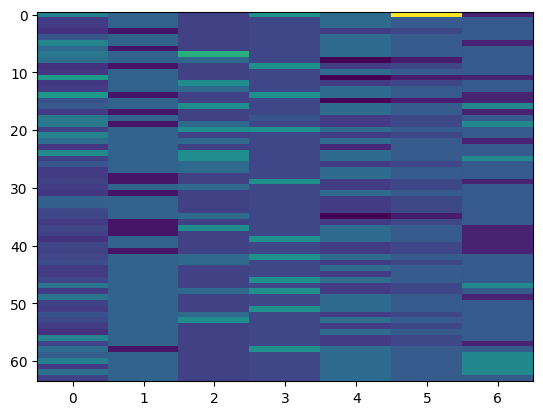

In [350]:
pro_base_T2_SDS_CGI = process_with_nan_using_imputation_zscore(base_T2_SDS_CGI)
pro_pyschiatry = process_with_nan_using_imputation_zscore(pyschiatry)
pro_pyschiatry = np.concatenate((pro_pyschiatry[:, :-3], pro_pyschiatry[:, -2:]), axis=1)
pro_HAMD_score = process_with_nan_using_imputation_zscore(HAMD_score)
pro_demographic = process_with_nan_using_imputation_zscore(demographic)
# plt.figure()
# plt.imshow(pro_base_T2_SDS_CGI, aspect='auto')
# plt.figure()
# plt.imshow(pro_pyschiatry, aspect='auto')
# plt.figure()
# plt.imshow(pro_HAMD_score, aspect='auto')
plt.figure()
plt.imshow(pro_demographic, aspect='auto')

all_clinical = np.concatenate((pro_base_T2_SDS_CGI, pro_pyschiatry, pro_HAMD_score, fnirs_feature), axis=1)



In [358]:
pro_HAMD_score.shape

(64, 3)

scaled by 1000000.0 Accuracy: 0.65625 Sensitivity is 0.7142857142857143 Specificity is 0.64
[0.64642361 0.67135417 0.62149306]


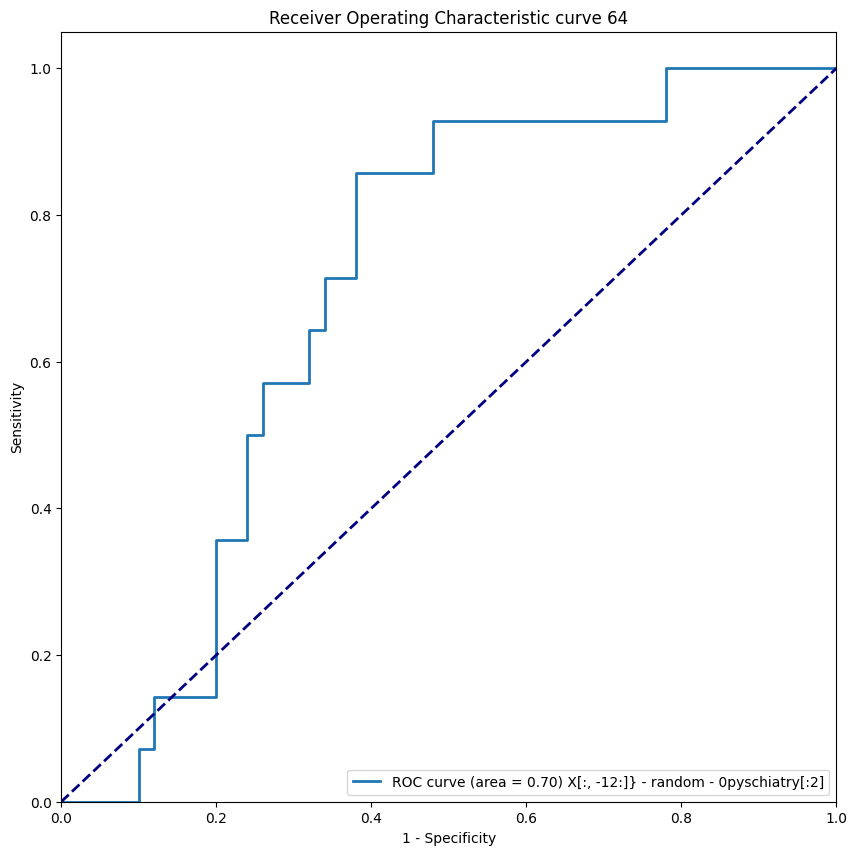

scaled by 1000000.0 Accuracy: 0.671875 Sensitivity is 0.7857142857142857 Specificity is 0.64
[0.69579861 0.75729167 0.63430556]


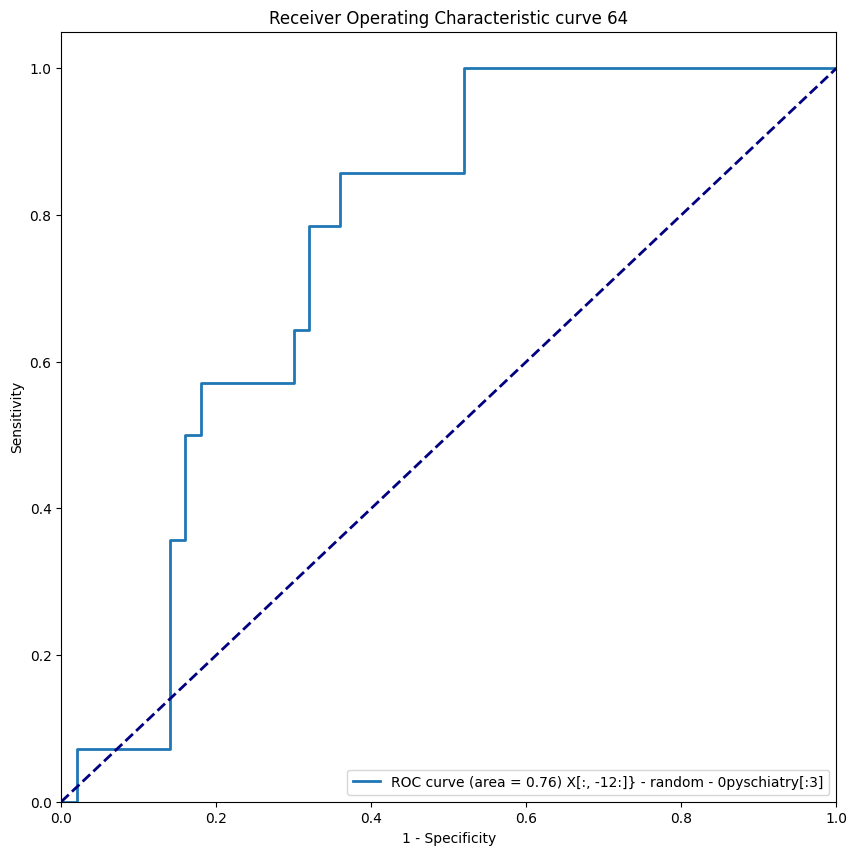

scaled by 1000000.0 Accuracy: 0.65625 Sensitivity is 0.6428571428571429 Specificity is 0.66
[0.70404514 0.75364583 0.65444444]


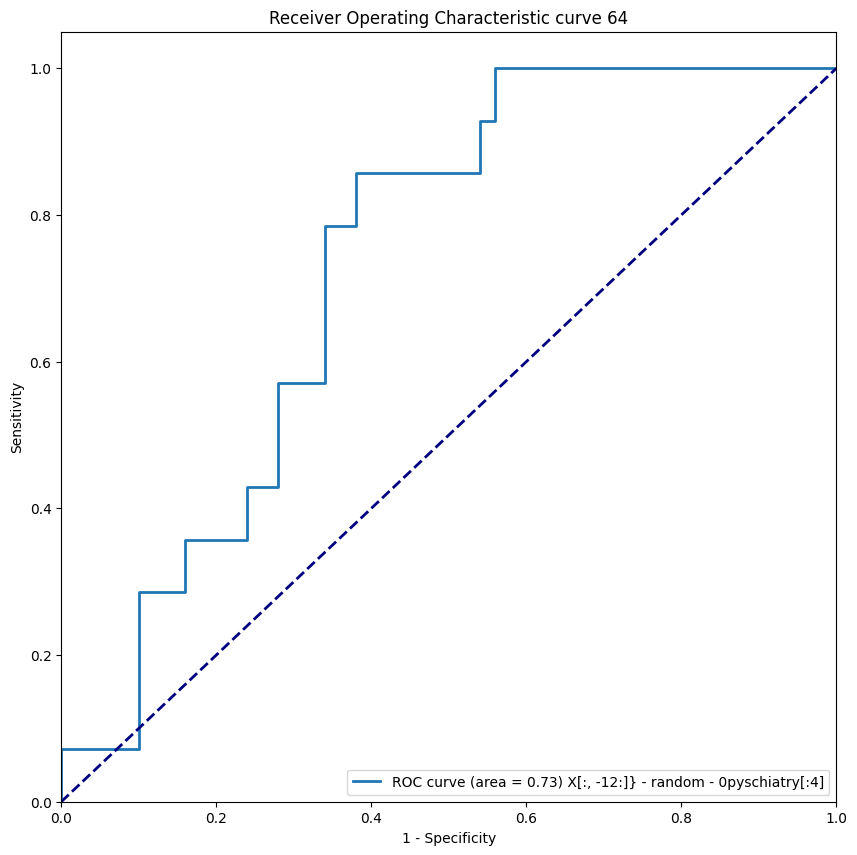

scaled by 1000000.0 Accuracy: 0.65625 Sensitivity is 0.5714285714285714 Specificity is 0.68
[0.71258681 0.7828125  0.64236111]


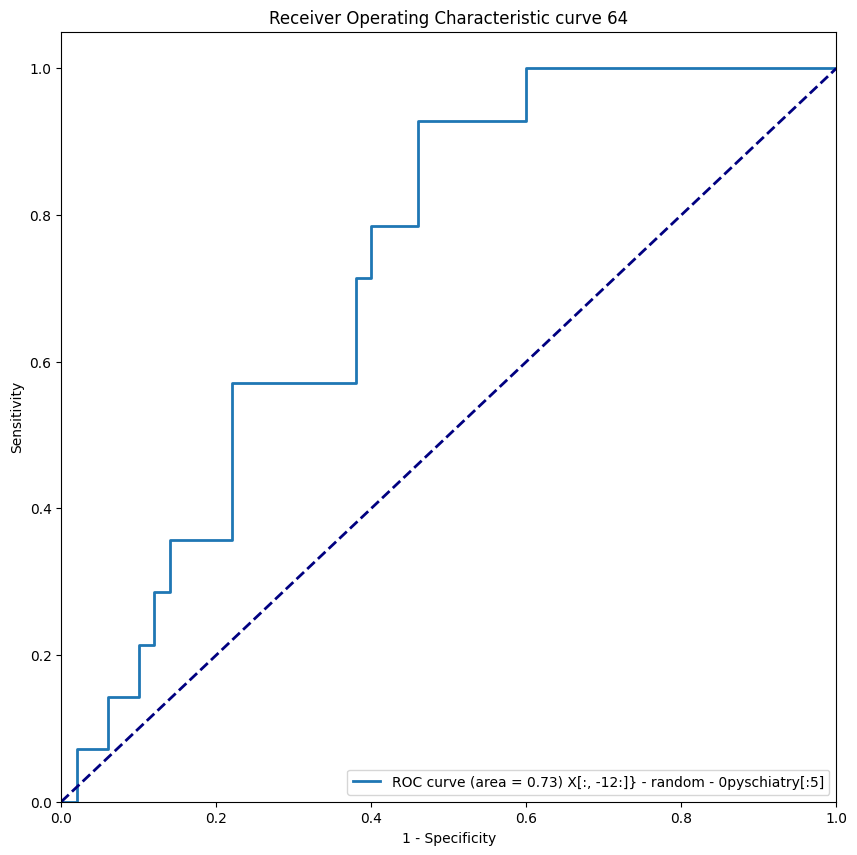

scaled by 1000000.0 Accuracy: 0.609375 Sensitivity is 0.5 Specificity is 0.64
[0.64649306 0.62760417 0.66538194]


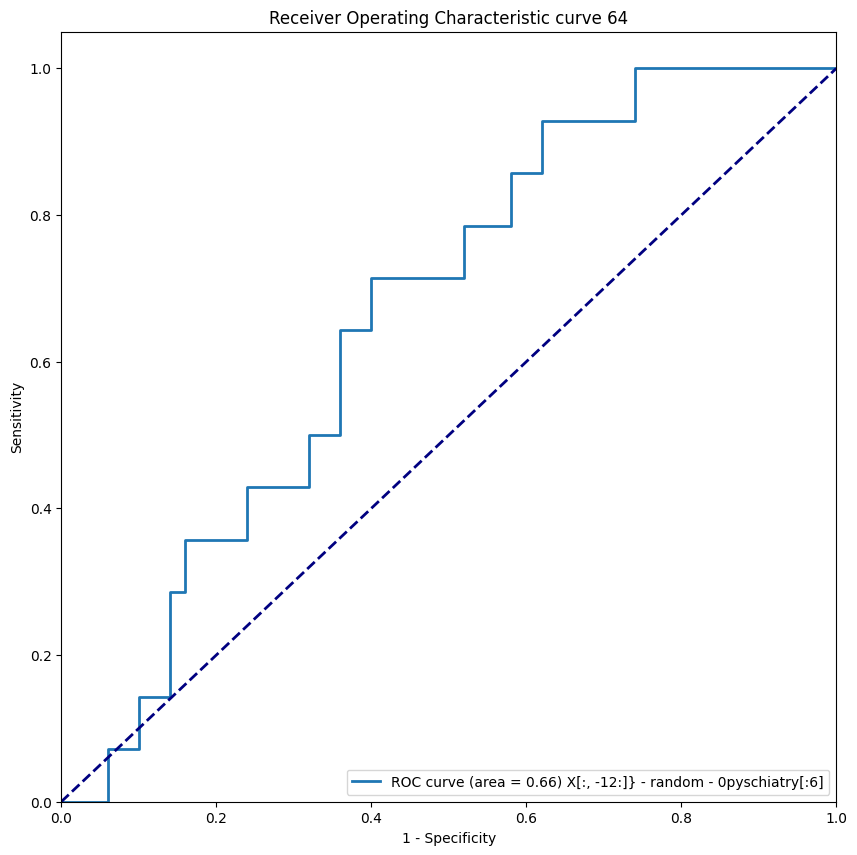

scaled by 1000000.0 Accuracy: 0.59375 Sensitivity is 0.5 Specificity is 0.62
[0.64375  0.634375 0.653125]


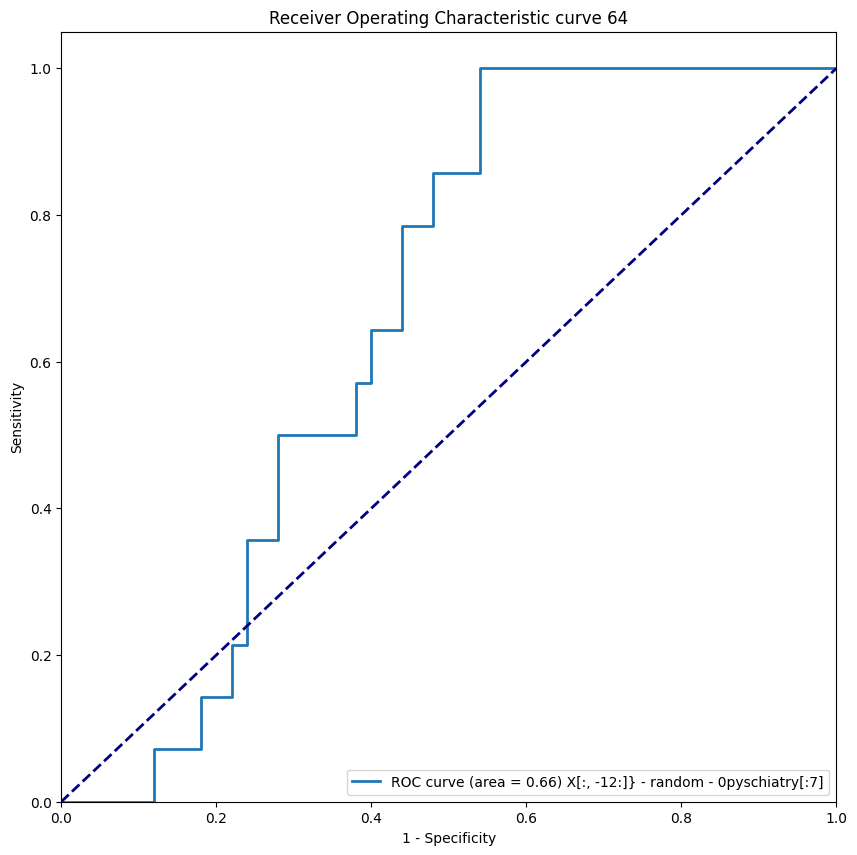

scaled by 1000000.0 Accuracy: 0.625 Sensitivity is 0.6428571428571429 Specificity is 0.62
[0.62390625 0.6        0.6478125 ]


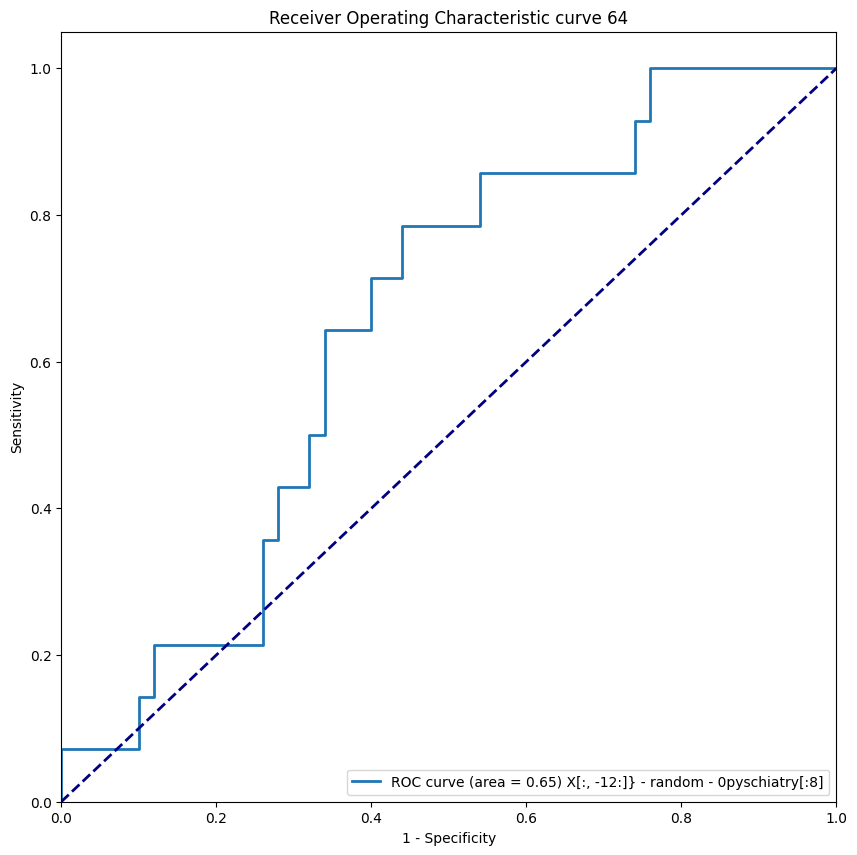

scaled by 1000000.0 Accuracy: 0.6875 Sensitivity is 0.7857142857142857 Specificity is 0.66
[0.64857639 0.65572917 0.64142361]


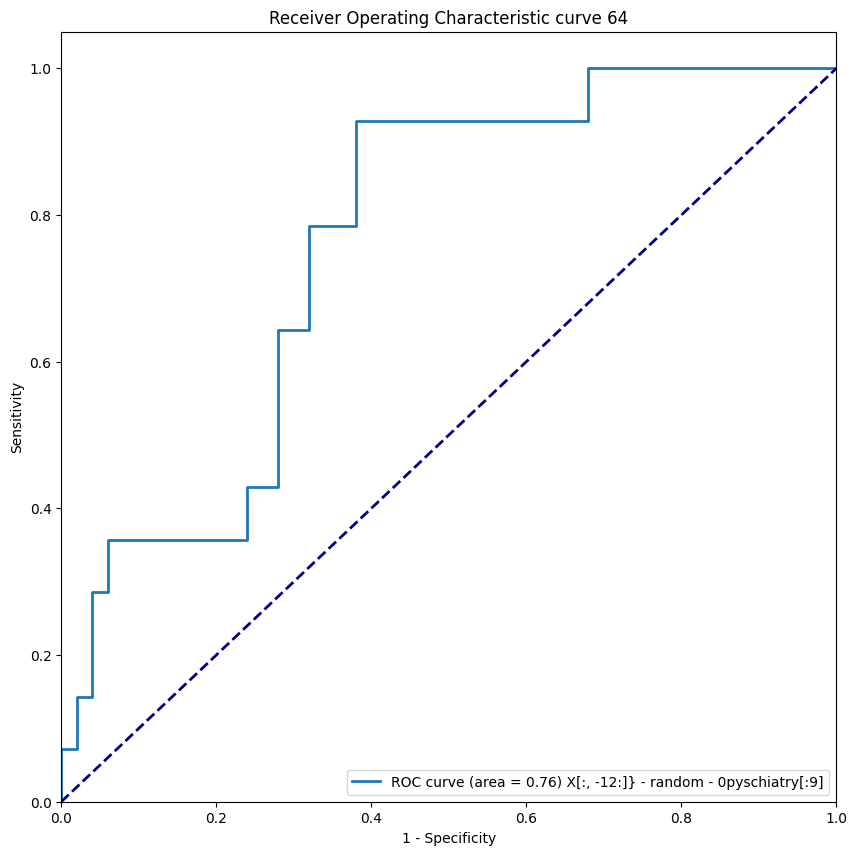

scaled by 1000000.0 Accuracy: 0.671875 Sensitivity is 0.7857142857142857 Specificity is 0.64
[0.63885417 0.65885417 0.61885417]


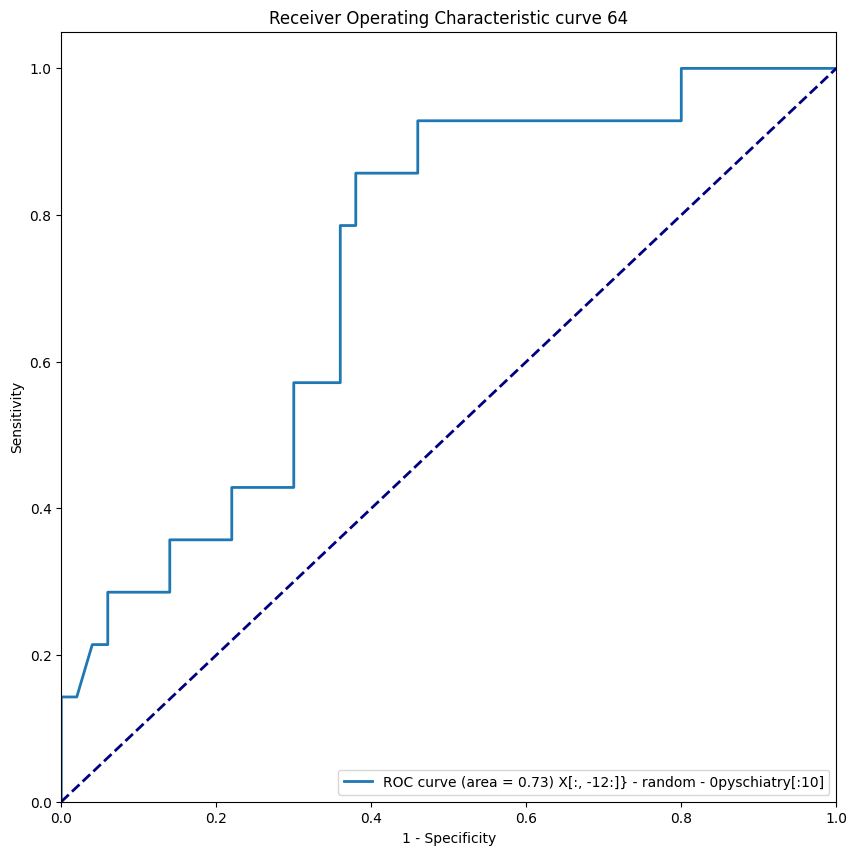

scaled by 1000000.0 Accuracy: 0.640625 Sensitivity is 0.5714285714285714 Specificity is 0.66
[0.62975694 0.61770833 0.64180556]


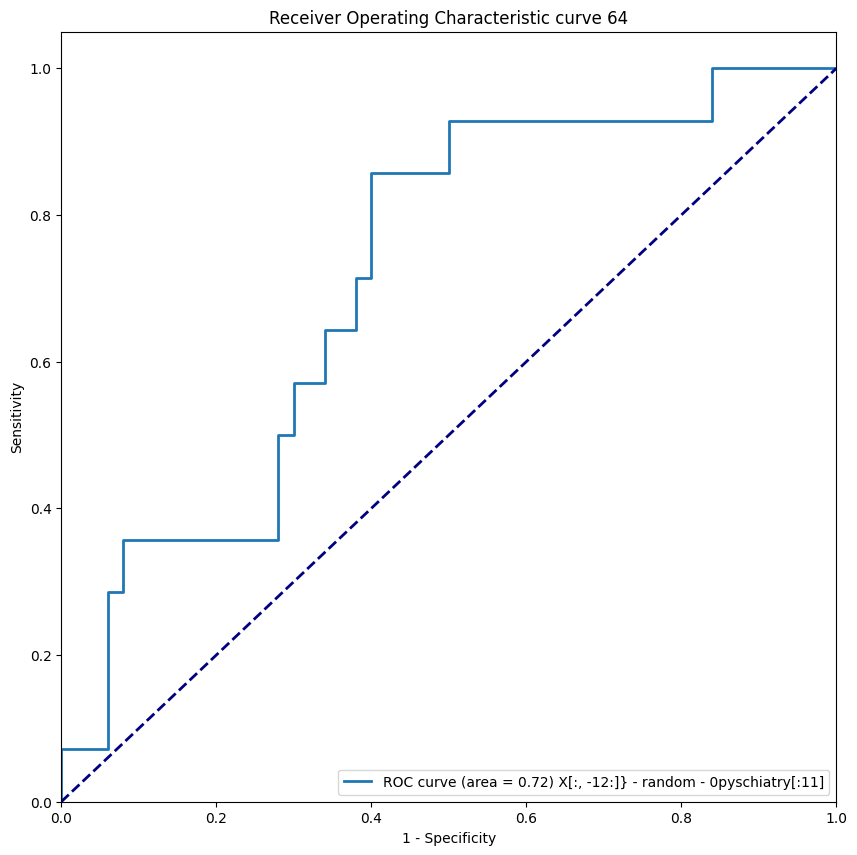

scaled by 1000000.0 Accuracy: 0.609375 Sensitivity is 0.5714285714285714 Specificity is 0.62
[0.66508681 0.66510417 0.66506944]


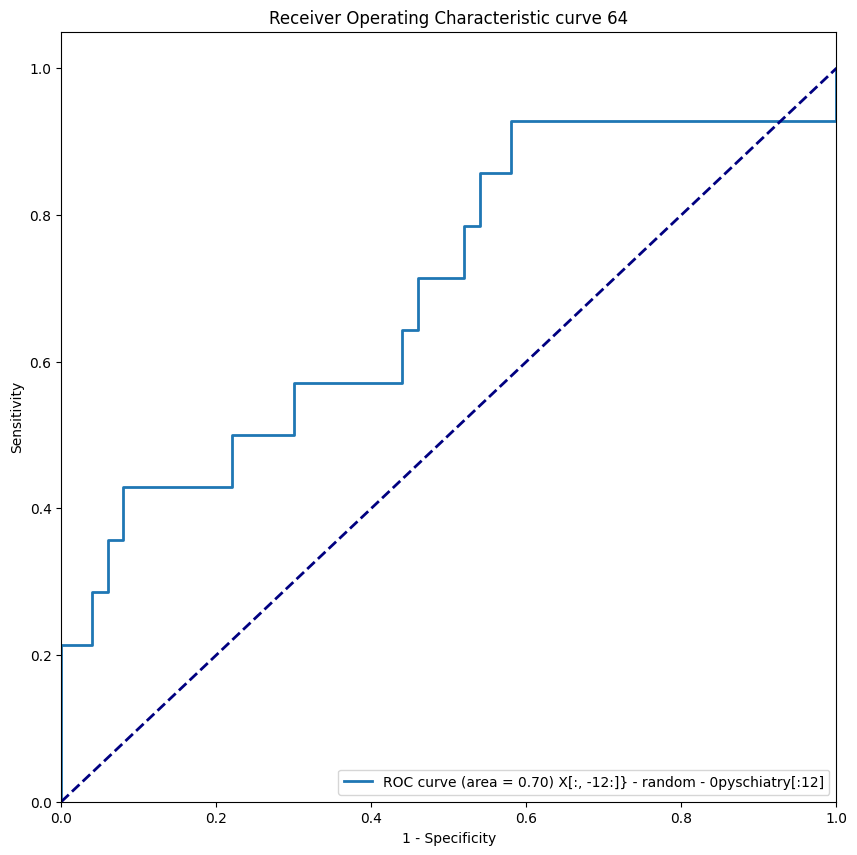

scaled by 1000000.0 Accuracy: 0.609375 Sensitivity is 0.5714285714285714 Specificity is 0.62
[0.65979167 0.65885417 0.66072917]


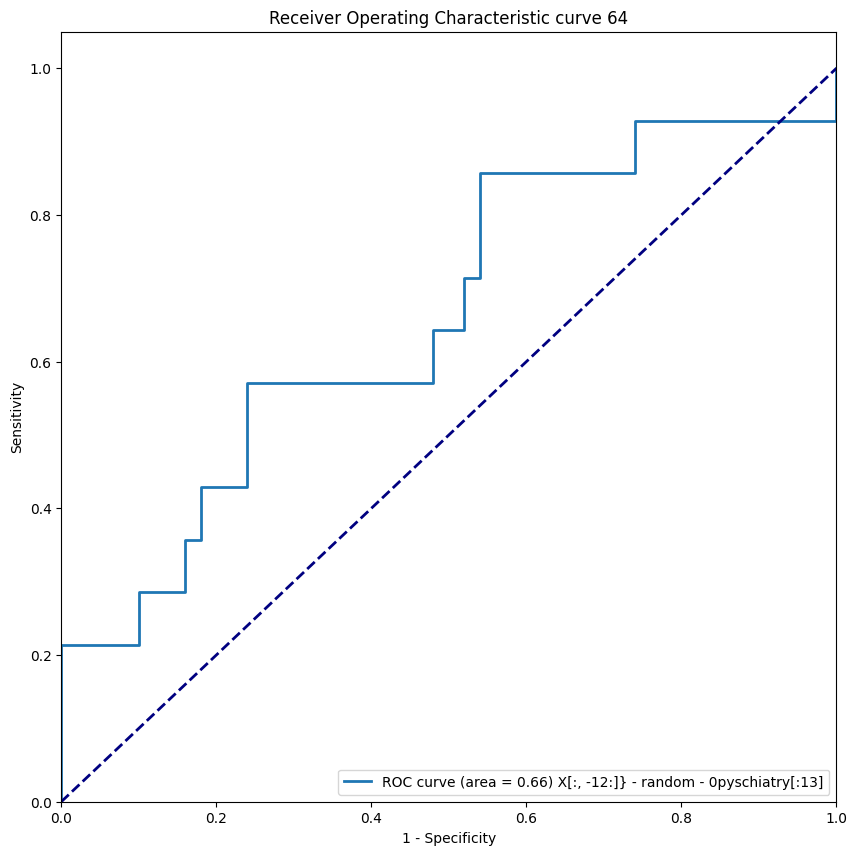

In [384]:
for i in range(1, pro_pyschiatry.shape[1]+1):
    Y = np.load(fold_path + '/label.npy', allow_pickle=True)
    X_replicated = np.concatenate((pro_pyschiatry[:, :i], 
                        pro_demographic,
                        fnirs_feature
                        ), axis=1)
    train_xgboost_shuffle_feature(X_replicated, Y, num_shuffle=1, msg=f'pyschiatry[:{i+1}]')

In [329]:
print(z_imputed_clinical_data.shape)
print(demographic_data.shape)
print(fnirs_prediction_all.shape)

X = np.concatenate((z_imputed_clinical_data, demographic_data, fnirs_feature), axis=1)

# np.save(fold_path + '/demo_11_cli_7_fnirs_1.npy', X)

(64, 7)
(64, 11)
(64, 1)


scaled by 1000000.0 Accuracy: 0.671875 Sensitivity is 0.5714285714285714 Specificity is 0.7
[0.71138889 0.78229167 0.64048611]
scaled by 1000000.0 Accuracy: 0.65625 Sensitivity is 0.5 Specificity is 0.7
[0.71475694 0.78385417 0.64565972]


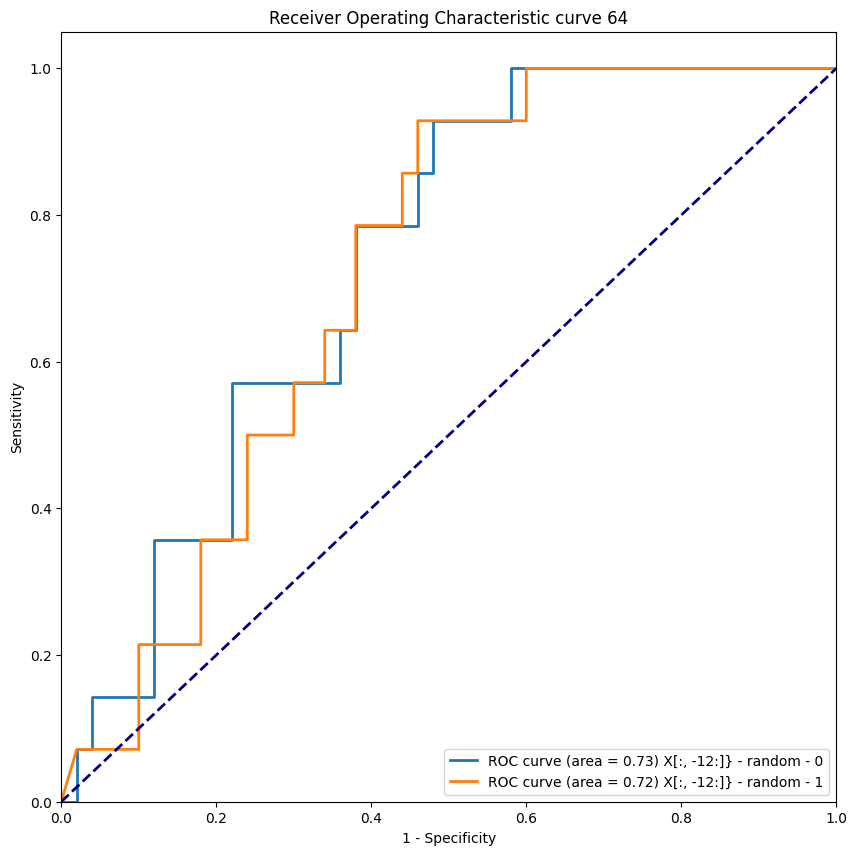

In [361]:
Y = np.load(fold_path + '/label.npy', allow_pickle=True)
feature_i = 11 # for feature_i in range(X.shape[1]):
train_xgboost_shuffle_feature(X[:, -feature_i-1:], Y)

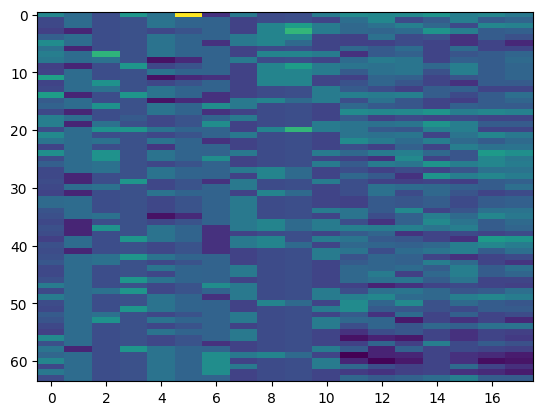

In [14]:
demo_cli_merge_data = np.concatenate((demographic_data, z_imputed_data), axis=1)
import matplotlib.pyplot as plt
plt.imshow(demo_cli_merge_data, aspect='auto')
np.save(fold_path + '/nor_demo_cli_merge_data.npy', demo_cli_merge_data)

In [25]:
combine = list(zip(demo_cli_merge_data, demo_cli_merge_data, demo_cli_merge_data))

import random
random.shuffle(combine)

a, b, c = zip(*combine)
print(a[0])
print(b[0])
print(c[0])


[-0.50490092  0.52915026 -0.60535015  2.19336545  0.81749636  0.24576958
  0.1855648  -0.96922337 -0.67419986 -0.5400228  -0.8819171   0.38460794
  0.72237662  0.89729277 -0.02881123  0.85416682 -0.89567103 -0.84482082]
[-0.50490092  0.52915026 -0.60535015  2.19336545  0.81749636  0.24576958
  0.1855648  -0.96922337 -0.67419986 -0.5400228  -0.8819171   0.38460794
  0.72237662  0.89729277 -0.02881123  0.85416682 -0.89567103 -0.84482082]
[-0.50490092  0.52915026 -0.60535015  2.19336545  0.81749636  0.24576958
  0.1855648  -0.96922337 -0.67419986 -0.5400228  -0.8819171   0.38460794
  0.72237662  0.89729277 -0.02881123  0.85416682 -0.89567103 -0.84482082]


In [24]:


Y_train = np.load(fold_path + '/label.npy', allow_pickle=True)

In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

X_train = X
Y_train = np.load(fold_path + '/label.npy', allow_pickle=True)

# 定义模型
model = CatBoostClassifier(verbose=0)

# 参数网格
param_grid = {
    'learning_rate': [1e-6],
    'depth': [4],
    'l2_leaf_reg': [5],
    'iterations': [100],
    'border_count': [32],


}

# 网格搜索
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# 最佳参数和性能
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


ModuleNotFoundError: No module named 'catboost'

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X_train = X
Y_train = np.load(fold_path + '/label.npy', allow_pickle=True)

# 定义模型
model = XGBClassifier(scale_pos_weight=61*1e5)

# 参数网格
# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 500],
    'max_depth': [4],  # Depth of trees. Increasing this value will make the model more complex and more likely to overfit.
    'learning_rate': [0.01],  # Step size shrinkage used to prevent overfitting. Range is [0,1]
    'scale_pos_weight': [1e2],  # A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
}

# 网格搜索
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, Y_train)

# 最佳参数和性能
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'scale_pos_weight': 100.0}
Best score: 1.0


In [30]:
demographic_data = np.load(fold_path + '/demografic_data.npy', allow_pickle=True)
demographic_data = demographic_data.astype(float)
demographic_data = np.nan_to_num(demographic_data, 0)
demographic_data = zscore(demographic_data, axis=0)
print(demographic_data)

[[ 1.54893332  0.52915026 -0.60535015  2.1665957   0.81749636  6.79962494
  -1.51102763  1.03175391 -0.67419986 -0.5400228   1.13389342]
 [-0.77874548  0.52915026 -0.60535015 -0.42521972  0.81749636  0.24576958
   0.1855648  -0.96922337 -0.67419986 -0.5400228  -0.8819171 ]
 [-0.77874548  0.52915026 -0.60535015 -0.42521972  0.81749636  0.24576958
   0.1855648  -0.96922337  1.4832397   2.50951771  1.13389342]
 [-1.05259005 -1.88982237 -0.60535015 -0.42521972 -0.80064077 -0.40961596
   0.1855648  -0.96922337  1.4832397   3.52603121  1.13389342]
 [ 0.04278821  0.52915026 -0.60535015 -0.42521972  0.81749636  0.24576958
   0.1855648   1.03175391  1.4832397   1.4930042  -0.8819171 ]
 [ 1.82277789  0.52915026 -0.60535015 -0.42521972  0.81749636  0.24576958
  -1.51102763  1.03175391  1.4832397   0.4764907  -0.8819171 ]
 [ 0.72739963 -1.88982237 -0.60535015 -0.42521972  0.81749636  0.24576958
   0.1855648  -0.96922337 -0.67419986 -0.5400228  -0.8819171 ]
 [ 1.27508876  0.52915026  3.40248531 -0.

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Create a scorer for specificity
specificity_scorer = make_scorer(specificity_score)

X_train = X[:, -2:]
Y_train = np.load(fold_path + '/label.npy', allow_pickle=True)
models = {
    'CatBoost': CatBoostClassifier(scale_pos_weight=5, verbose=0),
    'XGBoost': XGBClassifier(scale_pos_weight=61 * 1e5),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'Support Vector': SVC(),
    'NearestNeighbor': KNeighborsClassifier(),
    'Perceptron': Perceptron()
}


results = {}

for model_name, model in models.items():
    # Define the scorers you want to use
    scoring = {'balanced_accuracy': make_scorer(balanced_accuracy_score),
               'sensitivity': make_scorer(recall_score),
                'specificity': specificity_scorer}
    
    # Perform 5-fold cross-validation and get the results
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring, return_train_score=False)
    
    # Calculate mean scores
    mean_accuracy = cv_results['test_balanced_accuracy'].mean()
    mean_sensitivity = cv_results['test_sensitivity'].mean()
    mean_specificity = cv_results['test_specificity'].mean()
    
    # Store the results
    results[model_name] = {'bAcc': mean_accuracy, 'Sensitivity': mean_sensitivity, 'Specificity': mean_specificity}
    print(f"model - {model_name} - metrics - {results[model_name]}")


model - CatBoost - metrics - {'bAcc': 0.6633333333333333, 'Sensitivity': 0.6666666666666666, 'Specificity': 0.6599999999999999}
model - XGBoost - metrics - {'bAcc': 0.6466666666666667, 'Sensitivity': 0.7333333333333333, 'Specificity': 0.5599999999999999}
model - RandomForest - metrics - {'bAcc': 0.6166666666666666, 'Sensitivity': 0.4333333333333333, 'Specificity': 0.8}
model - DecisionTree - metrics - {'bAcc': 0.5733333333333333, 'Sensitivity': 0.36666666666666664, 'Specificity': 0.78}
model - Support Vector - metrics - {'bAcc': 0.5, 'Sensitivity': 0.0, 'Specificity': 1.0}
model - NearestNeighbor - metrics - {'bAcc': 0.49000000000000005, 'Sensitivity': 0.0, 'Specificity': 0.9800000000000001}
model - Perceptron - metrics - {'bAcc': 0.48999999999999994, 'Sensitivity': 0.3, 'Specificity': 0.6799999999999999}


In [208]:
X.shape

8 - > 3 ->  7 1 

(64, 19)

scaled by 1000000.0 Accuracy: 0.671875 Sensitivity is 0.5714285714285714 Specificity is 0.7
[0.71140625 0.78125    0.6415625 ]
scaled by 1000000.0 Accuracy: 0.640625 Sensitivity is 0.5714285714285714 Specificity is 0.66
[0.71447917 0.78072917 0.64822917]


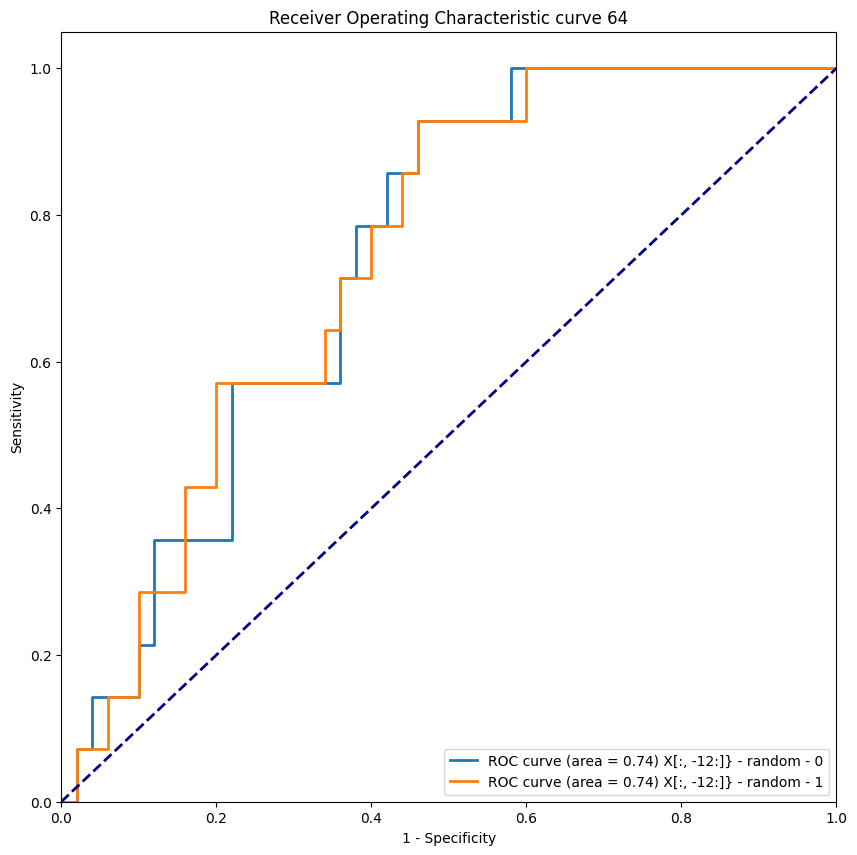

In [380]:
from sklearn.model_selection import LeaveOneOut, cross_validate, KFold, cross_val_predict
from sklearn.metrics import make_scorer, balanced_accuracy_score, recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import numpy as np


def train_xgboost_shuffle_feature(X, Y, num_shuffle=2, msg=""):
    scale = 1e6# for scale in [1e6]: # [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]:
    plt.figure(figsize=(10, 10))

    models = {
        'XGBoost': XGBClassifier(scale_pos_weight=scale, eval_metric='logloss'),
    }

    def specificity_score(y_true, y_pred):
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        specificity = tn / (tn + fp)
        return specificity

    # Create a scorer for specificity
    specificity_scorer = make_scorer(specificity_score)

    scoring = {'balanced_accuracy': make_scorer(balanced_accuracy_score),
                'sensitivity': make_scorer(recall_score),
                    'specificity': specificity_scorer}
    # Assuming X, Y, and a dictionary of models are already defined

    # Outer loop: Leave-One-Out Cross-Validation (LOOCV)
    loo = LeaveOneOut()

    X_tmp = X.copy()
    Y_tmp = Y.copy()

    all_fpr_tpr = []
    for shuffle_i in range(num_shuffle):
        
        y_pred_all = []
        results = {}
        all_inner_fold = []
        y_pred_prob_all = []

        # Shuffle X_tmp and Y_tmp
        shuffled_indices = np.random.permutation(X_tmp.shape[1])
        X_tmp_shuffled = X_tmp[:,shuffled_indices]
        Y_tmp_shuffled = Y_tmp#[shuffled_indices]




        # for model_name, model in models.items():
        model_name = 'XGBoost'
        model = XGBClassifier(scale_pos_weight=scale, eval_metric='logloss')
        balanced_accuracy_scores = []
        sensitivity_scores = []

        for train_index, test_index in loo.split(X):
            # Splitting the dataset for this LOOCV iteration
            X_train, X_test = X_tmp_shuffled[train_index], X_tmp_shuffled[test_index]
            Y_train, Y_test = Y_tmp_shuffled[train_index], Y_tmp_shuffled[test_index]
            cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring, return_train_score=False)
        
            # Calculate mean scores
            mean_accuracy = cv_results['test_balanced_accuracy'].mean()
            mean_sensitivity = cv_results['test_sensitivity'].mean()
            mean_specificity = cv_results['test_specificity'].mean()
            
            # Store the results
            results[model_name] = {'bAcc': mean_accuracy, 'Sensitivity': mean_sensitivity, 'Specificity': mean_specificity}
            all_inner_fold.append([results[model_name]['bAcc'], results[model_name]['Sensitivity'], results[model_name]['Specificity']])
            # print('inner cv results', results[model_name])
            # Inner loop: 5-fold cross-validation for training and validating the model
            # Note: Adjustments might be needed depending on how you intend to use the results of inner CV for model selection or tuning
            
            # Train the model using the inner CV folds
            # Note: You might use cross_val_predict or another approach here for model selection or tuning
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            probabilities = model.predict_proba(X_test)
            y_pred_prob_all.append(probabilities)
            y_pred_all.append(Y_pred)



        y_pred_ind = []
        for i in range(len(y_pred_all)):
            y_pred_ind.append(y_pred_all[i][0])
        accuracy = accuracy_score(Y_tmp_shuffled, y_pred_ind)

        # Calculate sensitivity (recall)
        sensitivity = recall_score(Y_tmp_shuffled, y_pred_ind)  # This is already done in your snippet

        # Calculate specificity
        tn, fp, fn, tp = confusion_matrix(Y_tmp_shuffled, y_pred_ind).ravel()
        specificity = tn / (tn + fp)
        print(f"scaled by {scale} Accuracy: {accuracy} Sensitivity is {sensitivity} Specificity is {specificity}")
        np_y_pred_prob_all = np.array([i[0] for i in y_pred_prob_all])
        fpr, tpr, _ = roc_curve(Y_tmp_shuffled, np_y_pred_prob_all[:, 1])
        all_fpr_tpr.append([fpr, tpr])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f) X[:, -%d:]} - random - %d' % (roc_auc, int(feature_i)+1, shuffle_i) + msg)

        all_inner_fold = np.array(all_inner_fold)
        all_inner_fold_mean = np.mean(all_inner_fold, axis=0)
        print(all_inner_fold_mean)
    # Plotting the ROC curve

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.title(f'Receiver Operating Characteristic curve {i+1}')
    plt.legend(loc="lower right")
    plt.show()
    
Y = np.load(fold_path + '/label.npy', allow_pickle=True)
feature_i = 11 # for feature_i in range(X.shape[1]):
train_xgboost_shuffle_feature(X[:, -feature_i-1:], Y)

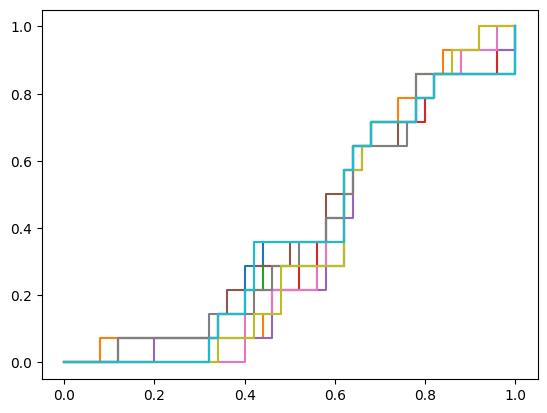

In [198]:
for i in all_fpr_tpr:
    plt.plot(i[0], i[1])

In [199]:
fprs = []
tprs = []
roc_aucs = []
for i in all_fpr_tpr:
    fprs.append(i[0])
    tprs.append(i[1])
    roc_aucs.append(auc(i[0], i[1]))

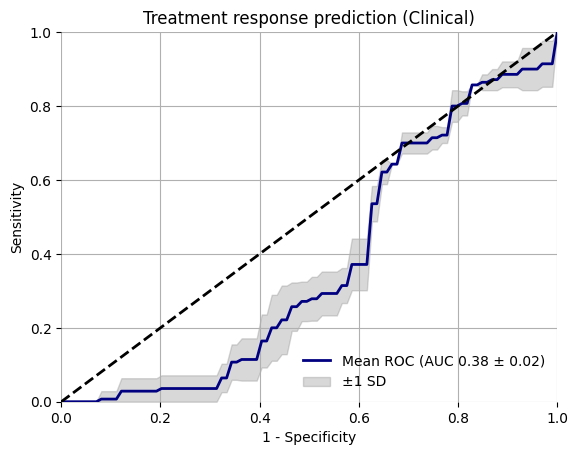

In [201]:

from scipy import interp
mean_fpr = np.linspace(0, 1, 100)

# Interpolate TPRs at these common FPR levels
mean_tpr = np.zeros_like(mean_fpr)
tpr_interpolated = []

for i in range(len(fprs)):
    tpr_interp = np.interp(mean_fpr, fprs[i], tprs[i])
    tpr_interpolated.append(tpr_interp)
    
    
# Calculate the mean TPR
tpr_interpolated = np.array(tpr_interpolated)
mean_tpr = tpr_interpolated.mean(axis=0)
std_tpr = tpr_interpolated.std(axis=0)

tpr_upper = np.minimum(mean_tpr + std_tpr, 1)
tpr_lower = np.maximum(mean_tpr - std_tpr, 0)

# Compute AUC
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(roc_aucs)
# mean_fpr = np.linspace(0, 1, 100)
# mean_tpr = np.zeros_like(mean_fpr)
# mean_tpr = np.interp(mean_fpr, fpr, tpr)
# roc_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, lw=2, color='#000080', label='Mean ROC (AUC %0.2f ± %0.2f)' % (roc_auc, std_auc))
plt.fill_between(mean_fpr, tpr_lower, tpr_upper, color='grey', alpha=0.3, label='±1 SD')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title(f'Treatment response prediction (Clinical)')
plt.legend(loc="lower right", frameon=False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()



# plt.plot(mean_fpr, mean_tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

In [1]:
import matplotlib.pyplot as plt
fusion_data[:,-1:]

last_fusion_data = fusion_data[:,-1:].copy()
pos_las = last_fusion_data[Y_train == 1]
neg_las = last_fusion_data[Y_train == 0]
plt.hist(pos_las, bins=20, alpha=0.5, label='Positive')

plt.figure()
plt.hist(neg_las, bins=20, alpha=0.5, label='Negative')

NameError: name 'fusion_data' is not defined